# Lab 9

### Problem 1

##### **Recreate your testNet neural network in Tensorflow and compare the performance of the two networks. Give possible reasons for their different performance.**

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay # Using the sklearn library for visualisation of the Confusion Matrix

2023-12-12 19:50:30.827486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 19:50:30.827514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 19:50:30.827528: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 19:50:30.832128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
with open("data/labels.txt", 'r') as file:                   # Open the labels.txt file to read the labels of images i.e. XXXXX.gif
    labels = np.array([int(line.strip()) for line in file])  # Read the labels into a 1D numpy array, convert each line to an integer (for representation as numerical values) and strip empty spaces

image_names = [f"test_{i:05d}.gif" for i in range(10000)]    # Utilize list comprehension to generate a list of all image names

data_images = np.zeros((10000, 28, 28))  # Creating a 3D numpy array for the images of data 

for i, img_name in enumerate(image_names):      # Iteratre through the names of the images and track the index & values with enumerate()
    img_path = os.path.join("data/", img_name)  # Join the data folder with the currently indexed image name via os module functions
    with Image.open(img_path) as img:           # Use Pillow to open an image, with makes sure the files is closed after block
        data_images[i] = np.array(img) / 255           # Convert the current image into a numpy array and divde by 255 to normalize to 1 (scaled pixel values to between 0 and 1)

labels.shape, data_images.shape, image_names[:5]       # Verify that the shapes of the array are correct via print statement

((10000,),
 (10000, 28, 28),
 ['test_00000.gif',
  'test_00001.gif',
  'test_00002.gif',
  'test_00003.gif',
  'test_00004.gif'])

In [3]:
# Recreating testNet in Tensorflow
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.6

testNet_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(hidden_nodes, activation = tf.nn.relu),
    keras.layers.Dense(output_nodes, activation = tf.nn.softmax)
])

testNet_model.compile(optimizer = keras.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

testNet_model.summary()  # Checking that model summary before training

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-12-12 19:50:32.847549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 19:50:32.850756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 19:50:32.850879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Problem 2

##### **Tensorflow’s fit method returns a history object which in turn contains an attribut history. Extract it from the object. Use it to plot the validation accuracy, training accuracy and loss as a function of the epoch. Set up a network with a single fully connected layer with 256 nodes (ReLU activated) and train it on MNIST Fashion.**

Epoch 1/10


2023-12-12 19:50:33.382578: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-12 19:50:33.470457: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0ebc045850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-12 19:50:33.470481: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2023-12-12 19:50:33.476663: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-12 19:50:33.493609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-12 19:50:33.617379: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


282/282 [==============================] - 2s 2ms/step - loss: 1.4356 - accuracy: 0.6342 - val_loss: 0.8663 - val_accuracy: 0.7780
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.7139 - accuracy: 0.8076 - val_loss: 0.6396 - val_accuracy: 0.8020
Epoch 3/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.8331 - val_loss: 0.5603 - val_accuracy: 0.8470
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.8418 - val_loss: 0.5617 - val_accuracy: 0.8170
Epoch 5/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.8587 - val_loss: 0.6113 - val_accuracy: 0.8130
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4459 - accuracy: 0.8687 - val_loss: 0.5344 - val_accuracy: 0.8360
Epoch 7/10
282/282 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8759 - val_loss: 0.4767 - val_accuracy: 0.8680
Epoch 8/10
282/28

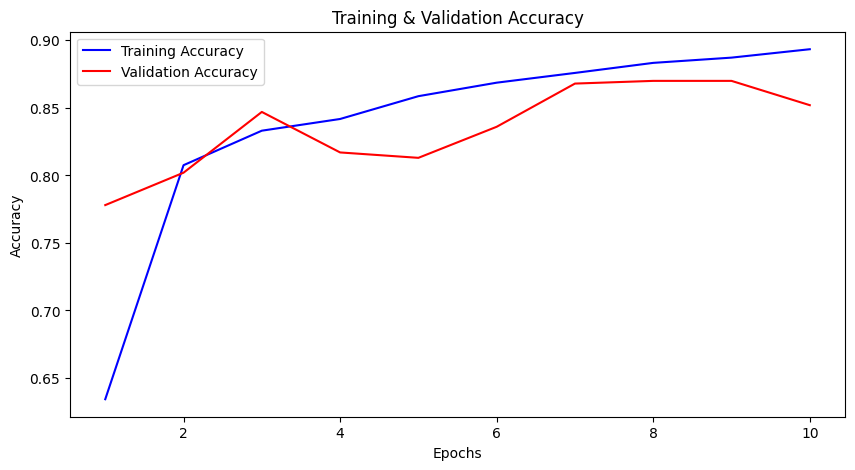

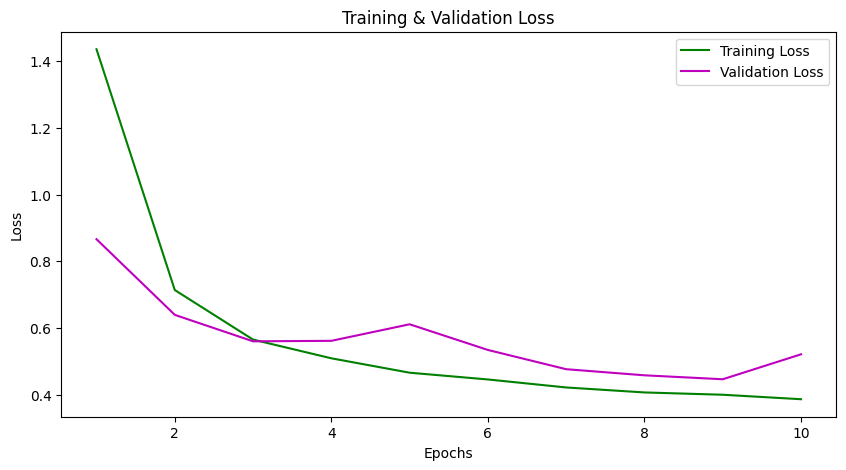

In [4]:
history = testNet_model.fit(data_images, labels, validation_split = 0.1, epochs = 10)
# Issue here is the validation data is the same as the training data, unlike example. Solve: validation split of 10% of dataset

testLoss, testAcc = testNet_model.evaluate(data_images, labels) # Need to evaulate with test data!

print('Network performance:', testAcc)

history_accuracy = history.history["accuracy"]                # Extracing history object data for evaluation
history_validation = history.history["val_accuracy"]
history_training_loss = history.history["loss"]
hisotry_validation_loss = history.history["val_loss"]
epochs = range(1, len(history_accuracy) + 1)

plt.figure(figsize = (10, 5))
plt.plot(epochs, history_accuracy, "b", label = "Training Accuracy")
plt.plot(epochs, history_validation, "r", label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(epochs, history_training_loss, "g", label = "Training Loss")
plt.plot(epochs, hisotry_validation_loss, "m", label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

(60000, 28, 28) (10000, 28, 28)


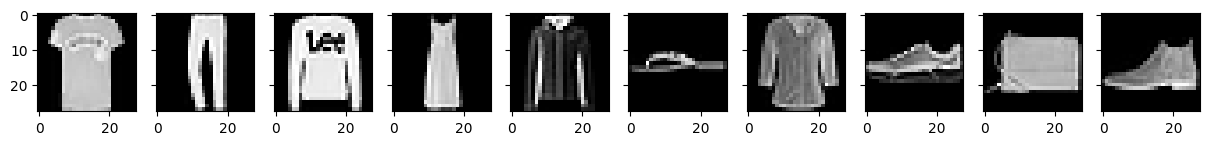

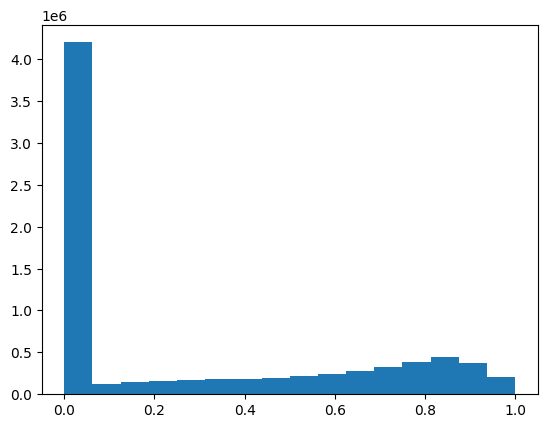

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4794 - accuracy: 0.8292 - val_loss: 0.4175 - val_accuracy: 0.8420
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8671 - val_loss: 0.3765 - val_accurac

In [5]:
# Setting up a network with a signle fully connected layer with 256 nodes (ReLu) activated
# Preparing the data & checking it
fashionMnist = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashionMnist.load_data()

print(trainImages.shape, testImages.shape)

sample = {}  # Dictionary
descriptors = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
nTrain = len(trainLabels)
nTest = len(testLabels)

for i in range(nTest):
    item = descriptors[ testLabels[i] ]
    if item not in sample:
        sample[item] = testImages[i,:,:]

fig, frames = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(15,10))

nPlots = len(descriptors)

for i in range(nPlots):
    item = descriptors[i]
    frames[i].imshow(sample[item], cmap='gray')

plt.show()

testImages = testImages/255    # Normalise testImages and trainImages
trainImages = trainImages/255

plt.hist(testImages.flatten(),16)
plt.show()

fashion_model = keras.models.Sequential([               # Building the model for the fashion MNIST
    keras.layers.Flatten(input_shape = (28, 28)),       # Input shape to account for 28x28 images
    keras.layers.Dense(256, activation = tf.nn.relu),   # 256 hidden nodes
    keras.layers.Dense(10, activation = tf.nn.softmax)  # 10 output layers with softmax to convert linear output to probabilities
])

fashion_model.compile(optimizer = keras.optimizers.Adam(),
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["accuracy"]
) 

fashion_model.summary()

fashion_history = fashion_model.fit(trainImages, trainLabels, validation_data = (testImages, testLabels), epochs=10)

testLoss, testAcc = fashion_model.evaluate(testImages, testLabels)

print('Network performance:', testAcc)

### Problem 3

##### **Tensorflow provides the tf.math.confusion_matrix method to create a simple confusion matrix. It returns a tf.tensor which can be converted into a regular Numpy array using np.array. Write a function confusion_matrix that takes a Tensorflow model and a test dataset, evaluates the test dataset, calculates the confusion matrix and turns it into something more readable, e.g. by providing labels, additional explanations, or even a nice graph via plt.img.**

In [6]:
# Examining example provided in 09_Tensorflow101
predictions = fashion_model.predict(testImages)
predictedLabels = np.array( [np.argmax( vec ) for vec in predictions] )
res = tf.math.confusion_matrix(testLabels,predictedLabels)
print(res)

# Creating a confusion matrix function for improved readability

def confusion_matrix(model, test_images, test_labels, item):
    predictions = model.predict(test_images)                                    # Call predict function, to predict which label belongs to which item 
    predicted_labels = np.argmax(predictions, axis = 1)                         # Determine the highest predicted values (labels) with indices by looking at the max values of the predicitons array
                                                                                # Indices from argmax will match the predicted labels for the items 

    confusing_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)  # Compute the confusion matrix
    confusing_matrix_array = np.array(confusing_matrix)                         # Convert the matrix into a numpy array for easier handling

    plt.figure(figsize = (8,6)) # Creating a plot for improved visualisation of the confusing matrix
    visualize_matrix = ConfusionMatrixDisplay(confusing_matrix_array, display_labels = item)  # Initialise a ConfusionMatrixDisplay object for better visibility
    visualize_matrix.plot(cmap = plt.cm.Blues)  # Plotting the matrix with a colourmap of different blue shades
    plt.title("Confusing Matrx :D")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.xticks(rotation = 45)  # X-axis labels rotated
    plt.show()



313/313 [==============================] - 0s 613us/step
tf.Tensor(
[[826   2  25  12   7   2 120   0   6   0]
 [  0 981   2  12   3   0   1   0   1   0]
 [ 15   0 882   7  54   1  39   0   2   0]
 [ 19  11  16 850  68   0  34   0   2   0]
 [  0   1 183  13 760   0  42   0   1   0]
 [  0   0   0   0   0 959   0  29   1  11]
 [ 87   0 121  20  73   0 692   0   7   0]
 [  0   0   0   0   0   5   0 972   1  22]
 [  2   0   6   3   6   4   2   3 974   0]
 [  0   0   0   0   0   7   1  35   0 957]], shape=(10, 10), dtype=int32)


<p style = "text-align: center;">
    <img src= "/home/nnds7b/Lab_9/ConfusionMatrix.png" alt= "Confusion Matrix">
</p>
<p style = "text-align: center;">
    Figure 1. Representation of a Confusion Matrix constructed with a display object imported from scikit-learn library
</p>

Source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay


313/313 [==============================] - 0s 807us/step


<Figure size 800x600 with 0 Axes>

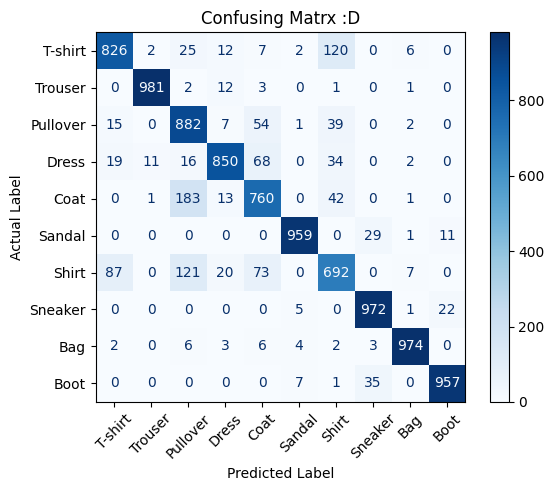

In [7]:
defined_items = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
confusion_matrix(fashion_model, testImages, testLabels, defined_items)

Evidently, the confusion matrx above demonstrates that for a majority of the items in the dataset, the model is capable of accurately predicting which item belongs to which label. The matrix verifies the accuracy measurement we previously computed, of 89%. As could be hypthosised when examining the dataset, items that share a similar profile, e.g. a T-Shirt and Shirt, experience a decrease in the accuracy of the predicted label against the actual label. In fact, examining all items it is clear that T-shirt, pullover and shirt have the lowest accuracy as these items share similar shapes and profile. Regardless, the model is capable of accurately predicting these items for the most part.

### Problem 4

##### So far, we have been working with grayscale images.

##### **a) Why are color images harder to process and cannot be directly fed into the neural networks that we have created up to this point?**

As opposed to a greyscale image, a image in colour contains an additional dimension regarding its representation. As a result, instead of a two-dimensional array representing the intensity of pixel across the image, a coloured image requires a three-dimensional array to account for the colour channel (i.e. RGB) of the image.

The addition of a dimension to the array representation of an image introduces further complexitiy in image processing as well as an additional parameter that needs to be considered. This in turn, increases the computational resources that are required to process these images.

In our scenario, the NN's we have created are specifically constructed to handle only two-dimensional arrays of greyscale images, which is defined during the design of the flattening layer with an input shape defined of (28, 28). These networks are simple, however, more complex NN's such as a convolutional neural network (CNN) are more capable of handling coloured images as these networks have the capacity to use a convolution kernel to share weights, with each layer of the network being activated by an area of the preceeding layer. 

Source: https://www.researchgate.net/publication/360754785_Convolutional_neural_network_for_color_images_classification


##### **b) In our shared folder, you will find a grayscale version of the famous CIFAR-10 dataset. It consists of a total of 60,000 images (32x32 pixels) of objects that each belong to one of ten classes (see classNames.txt). Load the data (provided as \*.npy files) into a notebook.**

In [8]:
data_path = "/home/nnds7b/cifar/"

cifer_trainImages = np.load(f"{data_path}/dataTrain.npy")    # Loading files for use
cifer_trainLabels = np.load(f"{data_path}/labelsTrain.npy")
cifer_testImages = np.load(f"{data_path}/dataTest.npy")
cifer_testLabels = np.load(f"{data_path}/labelsTest.npy")

with open(f"{data_path}/classNames.txt", "r") as file:       # Extracting the names of each class in the dataset
    class_names = file.read().splitlines()

print("Training Images & Labels:")                           # Checking the size of the dataset to confirm correctly loaded
print(f"Number of images: {len(cifer_trainImages)}")
print(f"Image shape: {cifer_trainImages[0].shape}")
print(f"Number of labels: {len(cifer_trainLabels)}")
print("Test Images & Labels:")
print(f"Number of images: {len(cifer_testImages)}")
print(f"Image shape: {cifer_testImages[0].shape}")
print(f"Number of labels: {len(cifer_testLabels)}")
print("Class Names:")
print(f"{class_names}")

Training Images & Labels:
Number of images: 50000
Image shape: (32, 32)
Number of labels: 50000
Test Images & Labels:
Number of images: 10000
Image shape: (32, 32)
Number of labels: 10000
Class Names:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


##### **c) Create a network with a single hidden layer with 256 nodes (ReLU activation) and a softmaxed output. Train the network for (up to) 50 epochs and discuss the performance of the network.**

In [9]:
# Building the model for tje CIFAR-10 dataset
cifar_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (32, 32)),       # CIFAR images are 32x32 pixels, modify input layer to match
    keras.layers.Dense(256, activation = tf.nn.relu),   # 256 hidden nodes layer
    keras.layers.Dense(10, activation = tf.nn.softmax)  # 10 output nodes for 10 class names
])

cifar_model.compile(optimizer = keras.optimizers.Adam(),
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["accuracy"]
) 

cifar_model.summary()  # Check model design

cifar_history = cifar_model.fit(cifer_trainImages, cifer_trainLabels, validation_data = 
                                (cifer_testImages, cifer_testLabels), epochs = 50)      # Fit model with training and test data for 50 epochs

cifar_testLoss, cifar_testAcc = cifar_model.evaluate(cifer_testImages, cifer_testLabels)

print('CIFAR Network performance:', cifar_testAcc)  # Evaluate the peformance of the network: 39% :(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 264970 (1.01 MB)
Trainable params: 264970 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0606 - accuracy: 0.2560 - val_loss: 1.9649 - val_accuracy: 0.2985
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9241 - accuracy: 0.3132 - val_loss: 1.8995 - val_accuracy: 0

313/313 [==============================] - 0s 684us/step


<Figure size 800x600 with 0 Axes>

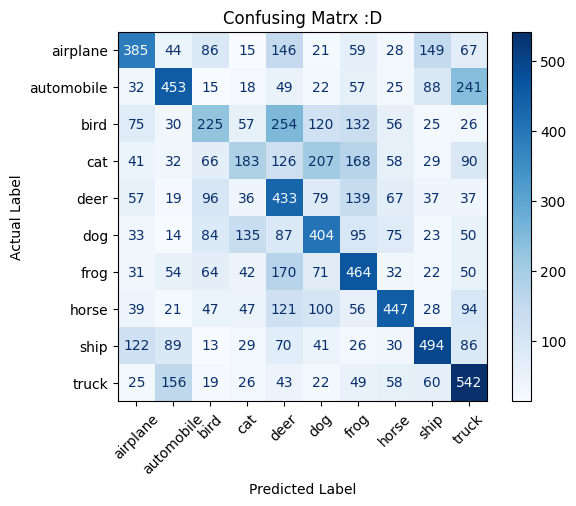

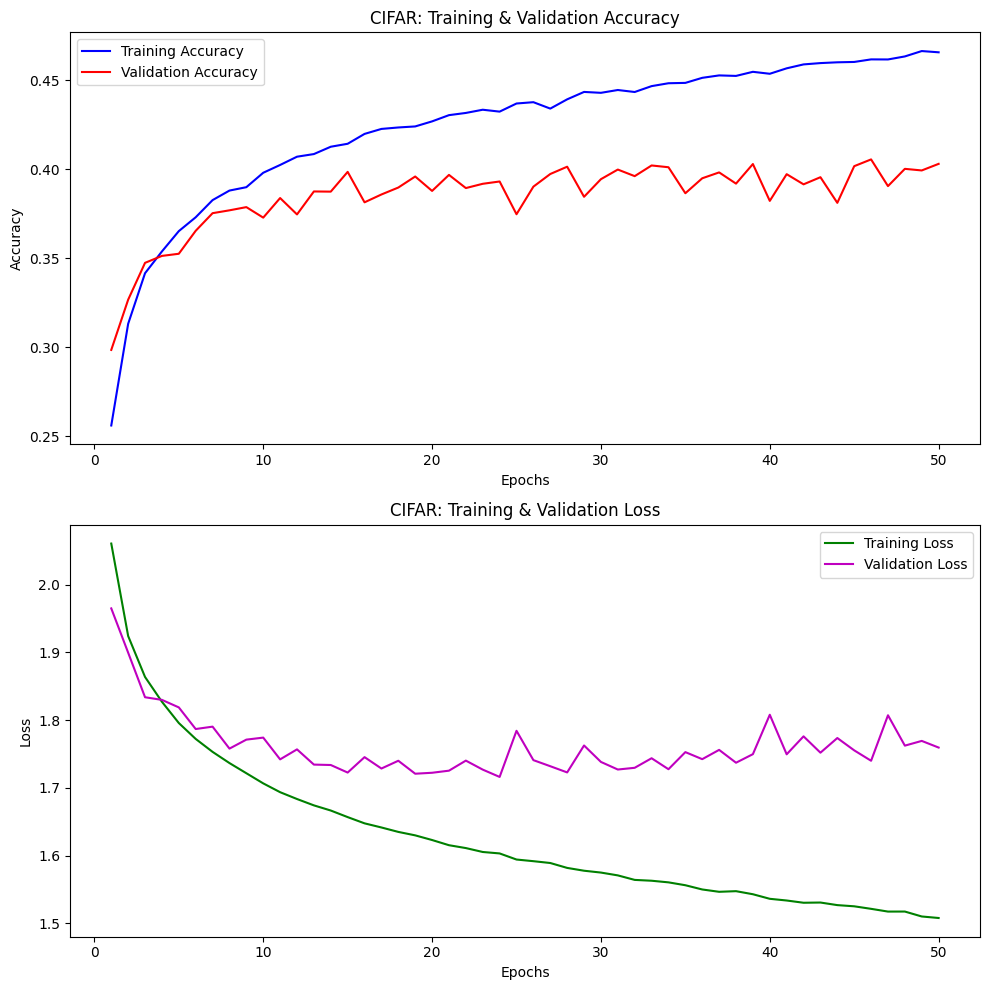

In [10]:
# Plotting Confusing Matrx :D
cifar_items = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
confusion_matrix(cifar_model, cifer_testImages, cifer_testLabels, cifar_items)

# Plotting Performance metrics
cifar_accuracy = cifar_history.history["accuracy"]                # Extracing history object data
cifar_validation = cifar_history.history["val_accuracy"]
cifar_training_loss = cifar_history.history["loss"]
cifar_validation_loss = cifar_history.history["val_loss"]
cifar_epochs = range(1, len(cifar_accuracy) + 1)

fig, axes = plt.subplots(2, 1, figsize = (10, 10))

axes[0].plot(cifar_epochs, cifar_accuracy, "b", label = "Training Accuracy")
axes[0].plot(cifar_epochs, cifar_validation, "r", label = "Validation Accuracy")
axes[0].set_title("CIFAR: Training & Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].plot(cifar_epochs, cifar_training_loss, "g", label = "Training Loss")
axes[1].plot(cifar_epochs, cifar_validation_loss, "m", label = "Validation Loss")
axes[1].set_title("CIFAR: Training & Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()


##### **d) Calculate the fraction of correctly classified images as a function of the image class.**

In [13]:
from collections import defaultdict

cifar_v2_predictions = cifar_model.predict(cifer_testImages)          # Generate predictions for each image
cifar_v2_predicted_labels = np.argmax(cifar_v2_predictions, axis = 1) # Use max indices to find "correctly" predicted labels

# Initialize a default dictionary of type int to store correct predictions for each class
# Chosen as can increment over data without needing to first have keys (image class), created "on the fly"
# Otherwise got an error for key 
correct_classified = defaultdict(int)
total_classified = defaultdict(int)

# Calculate correctly classified images per class
for i in range(len(cifer_testImages)):
    actual_label = cifer_testLabels[i]                 # Get actual label
    predicted_label = cifar_v2_predicted_labels[i]     # Get predicted label
    total_classified[actual_label] += 1                # Incremement total classified labels
    if predicted_label == actual_label:
        correct_classified[actual_label] += 1          # Check is correctly predicted label and add

fraction_correct_classified = {}                       # Dictionary to store fraction of correctly classified images
for class_label in range(10): 
    if total_classified[class_label] != 0:
        fraction_correct_classified[class_label] = correct_classified[class_label] / total_classified[class_label]
    else:
        fraction_correct_classified[class_label] = 0.0  # Avoid division by zero in case if total_classified is zero

for class_label, fraction in fraction_correct_classified.items():
    print(f"Class {class_label} has a fraction of correctly classified images of {fraction:.4f}")

313/313 [==============================] - 0s 591us/step


Class 0 has a fraction of correctly classified images of 0.3850
Class 1 has a fraction of correctly classified images of 0.4530
Class 2 has a fraction of correctly classified images of 0.2250
Class 3 has a fraction of correctly classified images of 0.1830
Class 4 has a fraction of correctly classified images of 0.4330
Class 5 has a fraction of correctly classified images of 0.4040
Class 6 has a fraction of correctly classified images of 0.4640
Class 7 has a fraction of correctly classified images of 0.4470
Class 8 has a fraction of correctly classified images of 0.4940
Class 9 has a fraction of correctly classified images of 0.5420


##### **e) Create a network with two hidden layers with 256 nodes each (ReLU activation) and a softmaxed output. Train the network for (up to) 50 epochs.**

In [14]:
cifar_model_v2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (32, 32)), 
    keras.layers.Dense(256, activation = "relu"),  
    keras.layers.Dense(256, activation = "relu"),  # Additional second hidden layer with 256 nodes and ReLU activation
    keras.layers.Dense(10, activation = "softmax")  
])

cifar_model_v2.compile(optimizer = keras.optimizers.Adam(),
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["accuracy"]
)

cifar_history_v2 = cifar_model_v2.fit(cifer_trainImages, cifer_trainLabels, validation_data = 
                                (cifer_testImages, cifer_testLabels), epochs = 50)

cifar_v2_testLoss, cifar_v2_testAcc = cifar_model_v2.evaluate(cifer_testImages, cifer_testLabels)

print('CIFAR Network performance:', cifar_v2_testAcc)  # Evaluate the peformance of the network: 40% :O

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0243 - accuracy: 0.2650 - val_loss: 1.9337 - val_accuracy: 0.3108
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8892 - accuracy: 0.3243 - val_loss: 1.8694 - val_accuracy: 0.3336
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8285 - accuracy: 0.3502 - val_loss: 1.8121 - val_accuracy: 0.3546
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7843 - accuracy: 0.3664 - val_loss: 1.7639 - val_accuracy: 0.3773
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7459 - accuracy: 0.3811 - val_loss: 1.7306 - val_accuracy: 0.3856
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7145 - accuracy: 0.3939 - val_loss: 1.7604 - val_accuracy: 0.3791
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6897 - accuracy: 0.3978 - val_loss: 1.7304 - val_accuracy:

313/313 [==============================] - 0s 777us/step


<Figure size 800x600 with 0 Axes>

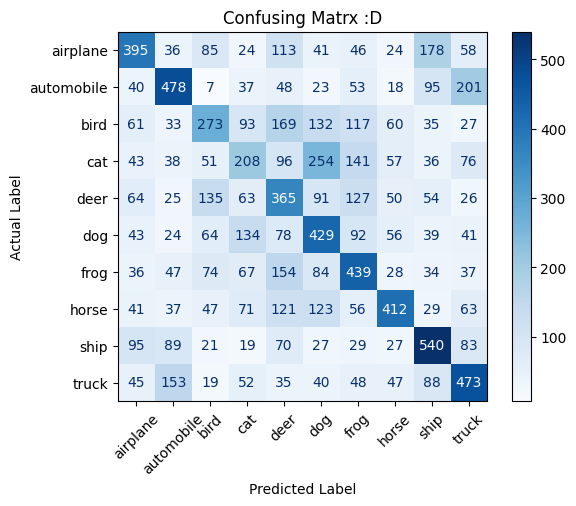

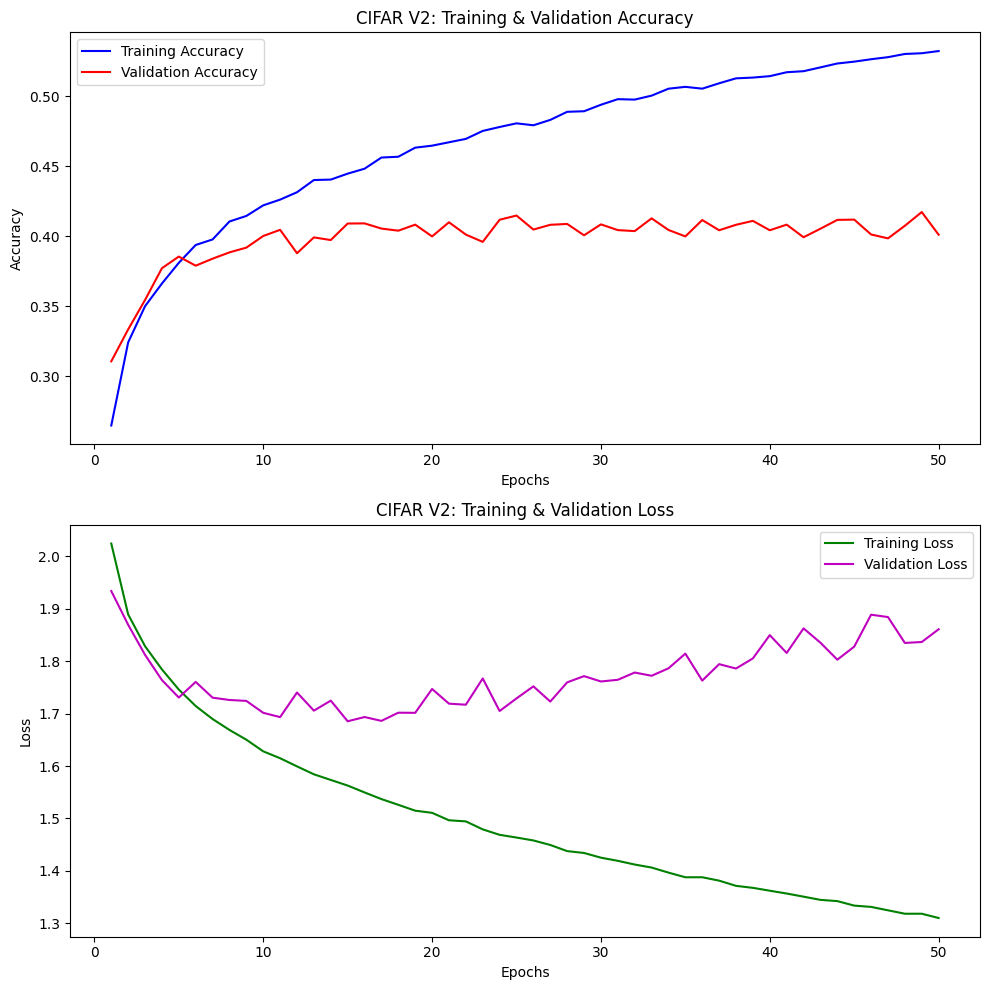

In [15]:
# Plotting Confusing Matrx :D for V2
confusion_matrix(cifar_model_v2, cifer_testImages, cifer_testLabels, cifar_items)

# Plotting Performance metrics
cifar_v2_accuracy = cifar_history_v2.history["accuracy"]             
cifar_v2_validation = cifar_history_v2.history["val_accuracy"]
cifar_v2_training_loss = cifar_history_v2.history["loss"]
cifar_v2_validation_loss = cifar_history_v2.history["val_loss"]
epochs_v2 = range(1, len(cifar_v2_accuracy) + 1)

fig, axes = plt.subplots(2, 1, figsize = (10, 10))

axes[0].plot(epochs_v2, cifar_v2_accuracy, "b", label = "Training Accuracy")
axes[0].plot(epochs_v2, cifar_v2_validation, "r", label = "Validation Accuracy")
axes[0].set_title("CIFAR V2: Training & Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].plot(epochs_v2, cifar_v2_training_loss, "g", label = "Training Loss")
axes[1].plot(epochs_v2, cifar_v2_validation_loss, "m", label = "Validation Loss")
axes[1].set_title("CIFAR V2: Training & Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()


##### **Did the performance improve?**

Examining the plots of the two models, it is clear, that it is a mixed bag in terms of whether the additional second hidden layer yields improved performance. Overall, the v2 model had a marginal improved accuracy of 40% as opposed to the original model, an accuracy of 39%. 

Delving into the confusion matrix between the two models, it is not apparent which model overall has a superior performance. Different classes from the CIFAR10 dataset experienced a depreciation in prediction accuracy whilst others experienced an improvement in prediction accuracy. If anything, one can observe that the v2 model had a larger distribution of predicitons compared to the original model. 

In regard to the training and validation accuracy, both models shared very similar trends with the v2 model experiencing a slightly imrpoved training accuracy. However, the validation accuracy of the two models is almost identical.

Furthermore, the training and validation loss of the two models shares similar trends. However, it is apüparent that the validation loss in the v2 model has increased, whereas, the training loss of both models is virtually identical.

Overall, we can conclude that the introduction of the second hidden layer, in this use case. has no beneficial performance gain. The minimal increase in accuracy of approx. 1% is weighted against a higher validation loss and larger distribution of prediction values across all classes of the dataset. Accounting for the additional resources and computation required for the introduction of the second layer of hidden nodes, it is not worth designing the model with this property for this use case.